In [1]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
import nltk
import koreanize_matplotlib

okt = Okt()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('csv/test.csv')

In [3]:
import re

def remove_special_characters(text):
    # 이모티콘 및 특수문자 제거를 위한 정규표현식
    pattern = r'[^a-zA-Z0-9가-힣\s]'  # 영문, 한글, 숫자, 공백만 허용

    # 정규표현식을 사용하여 특수문자 제거
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# '내용' 열의 각 행에 대해 이모티콘과 특수문자 제거
df['contents_sentense'] = df['contents'].dropna().apply(remove_special_characters)

In [4]:
df[['contents','contents_sentense']]

,contents,contents_sentense
0,🔥취업률 높은 취업유망직종!\n\n전액무료에 매월 교육수당까지 받을 수 있다고?🔥\...,취업률 높은 취업유망직종\n\n전액무료에 매월 교육수당까지 받을 수 있다고\n\n전...
1,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...
2,🙎‍♂️백엔드 배우면 어디 취업 가능해요?\n🙋‍♀️정답! 개발이 필요한 모든 분야...,백엔드 배우면 어디 취업 가능해요\n정답 개발이 필요한 모든 분야\n\n삼성 청년 ...
3,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...
4,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...,2024년 취업가능 항공 데이터 전문가 양성과정\n7기 선착순 모집중\n\n24년 ...
...,...,...
733,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자\n교육비 최대 100 국비지...
734,"스포츠브라 입고, 벗기 어렵다는 편견은 no!\n앞지퍼형 브라로 입고 벗기 1초👍\...",스포츠브라 입고 벗기 어렵다는 편견은 no\n앞지퍼형 브라로 입고 벗기 1초\n\n...
735,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요📈\n\n✅부동산을 소유하고 ...,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요\n\n부동산을 소유하고 있는...
736,✅부동산을 소유하고 있는데 가치를 잘 모른다면?\n✅수익성 높은 부동산 매물을 찾고...,부동산을 소유하고 있는데 가치를 잘 모른다면\n수익성 높은 부동산 매물을 찾고 있다...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# 예시 데이터
corpus = df['contents_sentense'].dropna().tolist()

# CountVectorizer 초기화
vectorizer = CountVectorizer()

# 텍스트 데이터를 벡터로 변환
X = vectorizer.fit_transform(corpus)

# 벡터화된 결과를 배열로 변환
vectorized_data = X.toarray()

# 단어 목록
words = vectorizer.get_feature_names_out()

# 결과 출력
print("Words:", words)
print("Vectorized Data:")
print(vectorized_data)

Words: ['01' '010' '01042522523' ... '힘들고' '힘들어하는' '힘을']
Vectorized Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
words

array(['01', '010', '01042522523', ..., '힘들고', '힘들어하는', '힘을'],
      dtype=object)

In [8]:
import re

# 예시 데이터


# 숫자를 제외한 부분을 추출하여 새로운 리스트 생성
result_list = [re.sub(r'\d', '', item) for item in words]

result_list = [item for item in words if item != '']
# 결과 출력

# 숫자가 4개 미만인 문자열을 추출하여 새로운 리스트 생성
result_list2 = [item for item in words if sum(c.isdigit() for c in item) < 4]


print(result_list2)

['01', '010', '01일', '02', '03', '03월', '04월', '05년생', '06배수', '07월', '09', '0원', '0원에', '0원으로', '10', '100', '100가지', '100개', '100곳', '100로', '100명', '100명에게', '100명의', '100무료', '100배', '100세', '100에', '100인', '100종부터', '100지원이벤트', '100취업보장', '100혜택', '10가지', '10개', '10개월', '10년', '10년간', '10년이상', '10년차', '10년차이자', '10년치의', '10명', '10시', '10억', '10여년', '10월말', '10일', '10일간만', '10일을', '10일일', '10주', '10초면', '11', '11개', '11대비', '11로', '11월', '11일', '11일까지', '11취업지원팀', '11컨설팅', '120만원감면', '120일', '124건의', '125', '125만', '12가지', '12가지의', '12개월', '12개의', '12길', '12번의', '12시간', '12일', '13가지', '13개소만', '13주', '14기', '14만', '14일', '14일간', '15', '150만', '155만', '158개의', '15년', '15위', '15인이', '15주', '15주매주', '160시간의', '160종', '16가지', '16일', '175만을', '17년간', '17시', '180만원', '18기', '18부터', '18일', '18일월', '18일월부터', '19시', '19일', '1개월', '1교시', '1기', '1기생', '1기인만큼', '1년', '1년간', '1달마다', '1대1', '1도', '1등까지', '1등을', '1만', '1만원', '1분', '1분주식', '1순위', '1시', '1시간만', '1월', '1월에', '1위', '1인', '1일', '1일까지'

In [9]:
result_list2

['01',
 '010',
 '01일',
 '02',
 '03',
 '03월',
 '04월',
 '05년생',
 '06배수',
 '07월',
 '09',
 '0원',
 '0원에',
 '0원으로',
 '10',
 '100',
 '100가지',
 '100개',
 '100곳',
 '100로',
 '100명',
 '100명에게',
 '100명의',
 '100무료',
 '100배',
 '100세',
 '100에',
 '100인',
 '100종부터',
 '100지원이벤트',
 '100취업보장',
 '100혜택',
 '10가지',
 '10개',
 '10개월',
 '10년',
 '10년간',
 '10년이상',
 '10년차',
 '10년차이자',
 '10년치의',
 '10명',
 '10시',
 '10억',
 '10여년',
 '10월말',
 '10일',
 '10일간만',
 '10일을',
 '10일일',
 '10주',
 '10초면',
 '11',
 '11개',
 '11대비',
 '11로',
 '11월',
 '11일',
 '11일까지',
 '11취업지원팀',
 '11컨설팅',
 '120만원감면',
 '120일',
 '124건의',
 '125',
 '125만',
 '12가지',
 '12가지의',
 '12개월',
 '12개의',
 '12길',
 '12번의',
 '12시간',
 '12일',
 '13가지',
 '13개소만',
 '13주',
 '14기',
 '14만',
 '14일',
 '14일간',
 '15',
 '150만',
 '155만',
 '158개의',
 '15년',
 '15위',
 '15인이',
 '15주',
 '15주매주',
 '160시간의',
 '160종',
 '16가지',
 '16일',
 '175만을',
 '17년간',
 '17시',
 '180만원',
 '18기',
 '18부터',
 '18일',
 '18일월',
 '18일월부터',
 '19시',
 '19일',
 '1개월',
 '1교시',
 '1기',
 '1기생',
 '1기인만큼',
 '1년',
 '1년간',
 '1달마다',
 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# 군집화할 키워드 추출
keywords = df['keyword'].unique()

# 군집화할 데이터 생성
cluster_data = []
for keyword in keywords:
    documents = df[df['keyword'] == keyword]['contents'].tolist()

    # NaN 값을 빈 문자열로 처리하고, 숫자(float)를 문자열로 변환
    processed_documents = [str(doc) if pd.notnull(doc) else '' for doc in documents]

    cluster_data.append(' '.join(processed_documents))

# 문서를 벡터화하여 군집화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cluster_data)

# K-Means 군집화
kmeans = KMeans(n_clusters=6)  # 예시로 3개의 군집 사용
kmeans.fit(X)

# 각 키워드에 해당하는 군집 번호 가져오기
cluster_labels = kmeans.labels_

# 각 군집에서의 단어 빈도수 계산
for i, keyword in enumerate(keywords):
    cluster_id = cluster_labels[i]
    print(f"Keyword: {keyword}, Cluster: {cluster_id}")

    # 해당 군집에서의 단어 빈도수 계산
    cluster_word_frequencies = X[cluster_labels == cluster_id].sum(axis=0)
    words = vectorizer.get_feature_names_out()
    frequencies = cluster_word_frequencies.flatten()

    # 상위 10개 단어 출력
    top_words = [words[idx] for idx in frequencies.argsort()[::-1][:10]]
    print(f"Top words: {top_words}")
    print("\n" + "="*50 + "\n")  # 결과를 구분하기 위해 구분선 추가


Keyword: Java 취업, Cluster: 4
Top words: [array([['00', '예측하기', '예측하고', ..., '주도', '취업', '백엔드']], dtype=object)]


Keyword: KDT, Cluster: 0
Top words: [array([['𝙧𝙚', '어떠한', '어떠셨나요', ..., 'pm', '취업', '서비스']], dtype=object)]


Keyword: K디지털트레이닝, Cluster: 0
Top words: [array([['𝙧𝙚', '어떠한', '어떠셨나요', ..., 'pm', '취업', '서비스']], dtype=object)]


Keyword: PM 취업, Cluster: 0
Top words: [array([['𝙧𝙚', '어떠한', '어떠셨나요', ..., 'pm', '취업', '서비스']], dtype=object)]


Keyword: 개발자 취업, Cluster: 5
Top words: [array([['𝙧𝙚', '수강문의', '수강료를', ..., '백엔드', '개발자', '취업']], dtype=object)]


Keyword: 데이터 취업, Cluster: 3
Top words: [array([['상담', '언젠가는', '언제든지', ..., '분석', '취업', '데이터']], dtype=object)]


Keyword: 부트캠프, Cluster: 2
Top words: [array([['상담', '비결은', '비결', ..., '백엔드', '부트캠프', '취업']], dtype=object)]


Keyword: 빅데이터, Cluster: 1
Top words: [array([['𝙧𝙚', '투명하게', '비합숙', ..., '빅데이터', '주식', '투자']], dtype=object)]




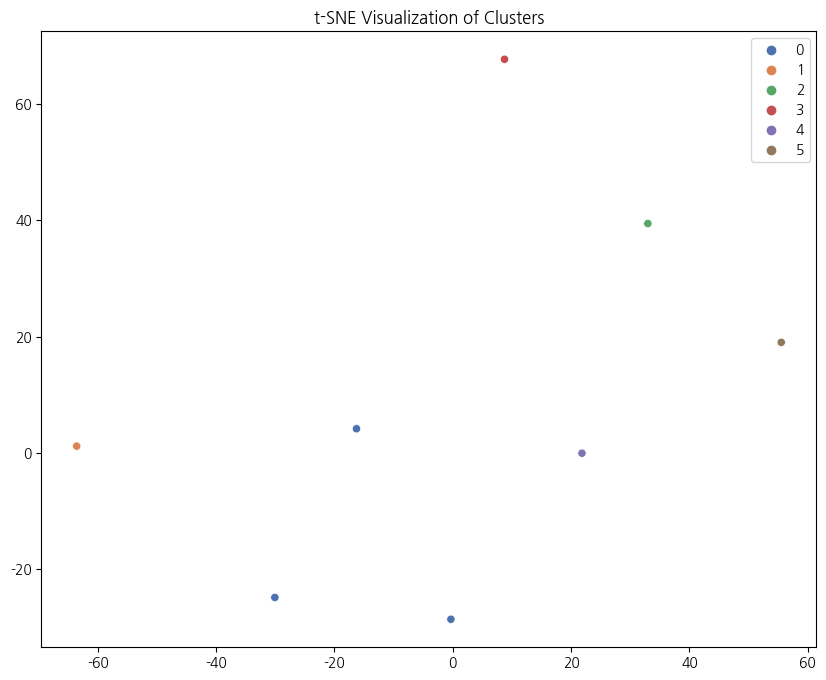

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42, perplexity=5)

X_tsne = tsne.fit_transform(X.toarray())
# 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=cluster_labels, palette="deep")
plt.title("t-SNE Visualization of Clusters")
plt.show()